In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from prophet import Prophet

mae: 4787.764490343668
RMSE: 5495.1454053900425


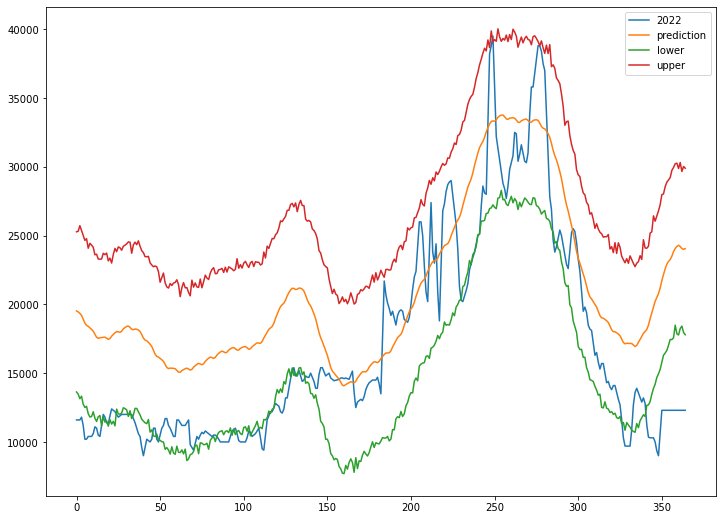

In [6]:
df = pd.read_csv('+22년se무_het.csv', encoding='cp949')
df['ds'] = pd.to_datetime(df['ds'])
test_df = df['y'].tail(365).reset_index(drop=True)

df['cap'] = (df['y'].max()*2)
df['floor'] = (df['y'].min()/2)
model_het = Prophet(growth='logistic',
    n_changepoints=25,
    changepoint_prior_scale=0.02,
    seasonality_prior_scale=10,
    #seasonality_mode='additive',
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    daily_seasonality=True,)
model_het.fit(df)

future = model_het.make_future_dataframe(periods=365)
future['cap'] = (df['y'].max()*2)
future['floor'] = (df['y'].min()/2)

forecast = model_het.predict(future)
pred_het = forecast['yhat'].tail(365).reset_index(drop=True)
lower = forecast['yhat_lower'].tail(365).reset_index(drop=True)
upper = forecast['yhat_upper'].tail(365).reset_index(drop=True)


from sklearn.metrics import mean_absolute_error
print('mae:',mean_absolute_error(test_df, pred_het))
print('RMSE:', mean_squared_error(test_df, pred_het)**0.5)
# 모델 저장 코드
# import joblib
# joblib.dump(model_het, 'model/gw_무_prophet20.pkl')

#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(df['y'].tail(365).reset_index(drop=True), label = '2022')
plt.plot(pred_het, label = 'prediction')
plt.plot(lower, label = 'lower')
plt.plot(upper, label = 'upper')
plt.legend()
plt.show()

In [ ]:
############################################################################################################

In [ ]:
############################################################################################################

In [ ]:
############################################################################################################

In [ ]:
############################################################################################################

In [124]:
df['ds'] = pd.to_datetime(df['ds'])

In [125]:
df

,ds,y
0,2016-01-01,7775.0
1,2016-01-02,7850.0
2,2016-01-03,7925.0
3,2016-01-04,8000.0
4,2016-01-05,8000.0
...,...,...
2187,2021-12-27,9710.0
2188,2021-12-28,9700.0
2189,2021-12-29,9690.0
2190,2021-12-30,9850.0


In [4]:
x=df.drop(columns='무가격')
y=df['무가격']
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2)

In [5]:
train_x.shape

(2337, 7)

In [6]:
model_li = LinearRegression()
model_li.fit(train_x,train_y)

LinearRegression()

In [7]:
pred = model_li.predict(test_x)
print('RMSE:', mean_squared_error(test_y, pred)**0.5)
print(round(r2_score(test_y, pred),5))

RMSE: 6098.423713337828
0.21116


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble

In [9]:
model_rf = RandomForestRegressor(n_estimators=200,max_depth=30, min_samples_leaf=1, min_samples_split=2,n_jobs=-1)
model_rf.fit(train_x,train_y)
pred = model_rf.predict(test_x)
print('RMSE:', mean_squared_error(test_y, pred)**0.5)
print(round(r2_score(test_y, pred),5))

RMSE: 702.1926143197901
0.98954


In [10]:
model_gb = ensemble.GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,max_depth=10)
model_gb.fit(train_x,train_y)
pred = model_gb.predict(test_x)
print('RMSE:', mean_squared_error(test_y, pred)**0.5)
print(round(r2_score(test_y, pred),5))

RMSE: 520.1282566322437
0.99426


In [11]:
train_x.shape

(2337, 7)

In [ ]:
###################################################################

In [24]:
test_df = pd.read_csv('22_가격동향_무.csv',encoding='utf-8')

In [126]:
test_df = pd.read_csv('22_가격동향_무.csv',encoding='utf-8')
test_df = test_df.interpolate(method='linear')
test_df = test_df.fillna(method='bfill')
test_df['일자'] = test_df['일자'].apply(lambda x: pd.to_datetime(str(x),format='%Y-%m-%d'))
con_2022 = test_df[['일자','광주\n단위 (원)']].copy()
con_2022.rename(columns = {'일자' : 'ds','광주\n단위 (원)' : 'y'}, inplace = True)
df = pd.concat([df,con_2022]).reset_index(drop=True)
df.to_csv('train/+22년gw무_het.csv',encoding='cp949',index=False)
df

,ds,y
0,2016-01-01,7775.0
1,2016-01-02,7850.0
2,2016-01-03,7925.0
3,2016-01-04,8000.0
4,2016-01-05,8000.0
...,...,...
2552,2022-12-27,9750.0
2553,2022-12-28,9750.0
2554,2022-12-29,9750.0
2555,2022-12-30,9750.0


In [34]:
pred_rf = model_rf.predict(x_t)
print('RMSE:', mean_squared_error(test_df, pred_rf)**0.5)
print(round(r2_score(test_df, pred_rf),5))

RMSE: 9173.56067339755
-0.46565


In [35]:
pred_gb = model_gb.predict(x_t)
print('RMSE:', mean_squared_error(test_df, pred_gb)**0.5)
print(round(r2_score(test_df, pred_gb),5))

RMSE: 9119.176976093673
-0.44832


In [36]:
pred_lstm = model.predict(x_t)
print('RMSE:', mean_squared_error(test_df, pred_lstm)**0.5)
print(round(r2_score(test_df, pred_lstm),5))

12/12 [==============================] - 0s 2ms/step
RMSE: 8324.226469035602
-0.20682


In [35]:
import joblib
joblib.dump(model_het, 'se_무_prophet20.pkl')

['se_무_prophet20.pkl']

In [127]:
df['cap'] = (df['y'].max()*2)
df['floor'] = (df['y'].min()/2)

In [128]:
model_het = Prophet(growth='logistic',
    n_changepoints=25,
    changepoint_prior_scale=0.02,
    seasonality_prior_scale=10,
    #seasonality_mode='additive',
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    daily_seasonality=True,)
model_het.fit(df)

In [129]:
future = model_het.make_future_dataframe(periods=365)

In [130]:
future['cap'] = (df['y'].max()*2)
future['floor'] = (df['y'].min()/2)

In [131]:
forecast = model_het.predict(future)
pred_het = forecast['yhat'].tail(365).reset_index(drop=True)
from sklearn.metrics import mean_absolute_error
#print('mae:',mean_absolute_error(test_df/20, pred_het/20))
#print('RMSE:', mean_squared_error(test_df/20, pred_het/20)**0.5)

In [132]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365)

,ds,yhat,yhat_lower,yhat_upper
2557,2023-01-01,13531.561738,7334.671665,19855.718236
2558,2023-01-02,13490.157152,7157.345696,19754.591657
2559,2023-01-03,13380.805130,6608.488551,20018.722578
2560,2023-01-04,13277.557903,6282.994166,19559.862268
2561,2023-01-05,13123.368210,5836.375579,19776.057017
...,...,...,...,...
2917,2023-12-27,14622.184430,7981.331201,20775.672588
2918,2023-12-28,14574.244226,8762.035002,21120.820088
2919,2023-12-29,14499.233276,8173.118135,20784.727133
2920,2023-12-30,14466.462642,7892.646845,20864.532370


In [134]:
pred2023 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365).reset_index(drop=True).copy()
pred2023.to_csv('gw_무_2023.csv',encoding='cp949',index=False)
import joblib
joblib.dump(model_het, 'model/gw_무_prophet20.pkl')

['model/gw_무_prophet20.pkl']

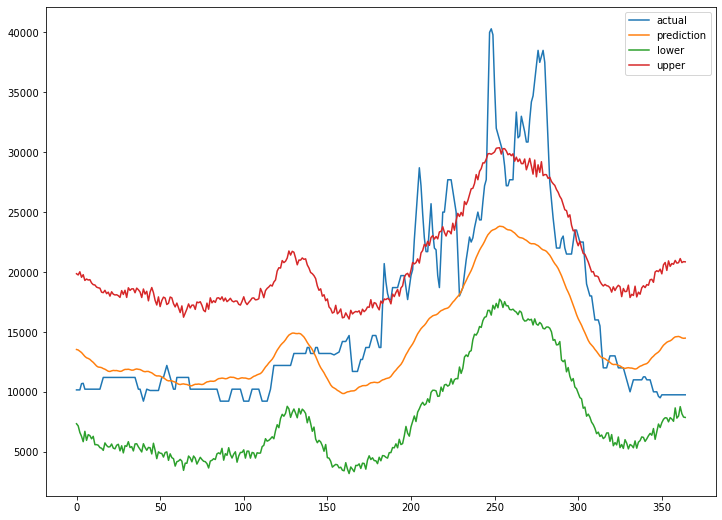

In [133]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(test_df['광주\n단위 (원)'], label = 'actual')
plt.plot(pred_het, label = 'prediction')
plt.plot(forecast['yhat_lower'].tail(365).reset_index(drop=True), label = 'lower')
plt.plot(forecast['yhat_upper'].tail(365).reset_index(drop=True), label = 'upper')
plt.legend()
plt.show()

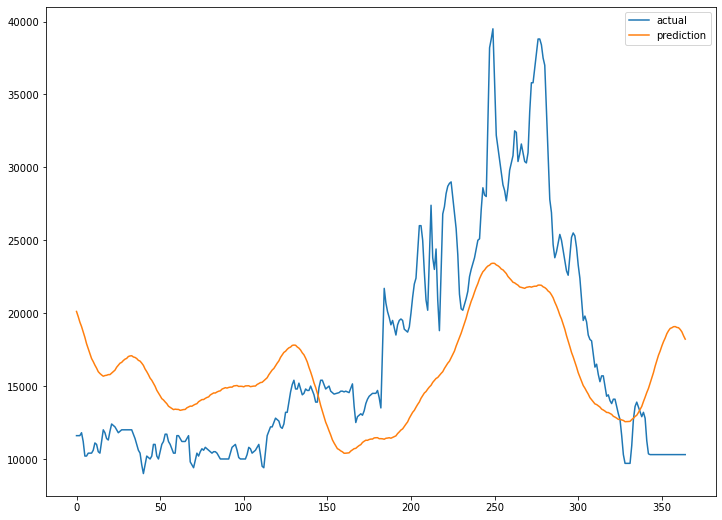

In [248]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(test_df, label = 'actual')
plt.plot(pred_het, label = 'prediction')
plt.legend()
plt.show()

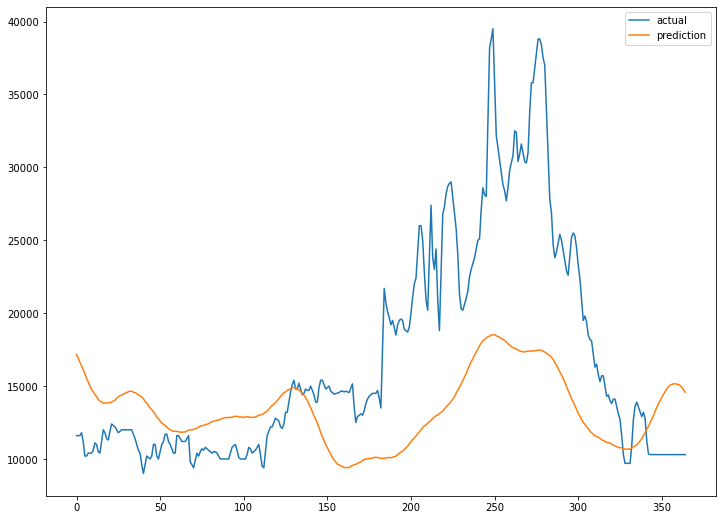

In [145]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(test_df, label = 'actual')
plt.plot(pred_het, label = 'prediction')
plt.legend()
plt.show()

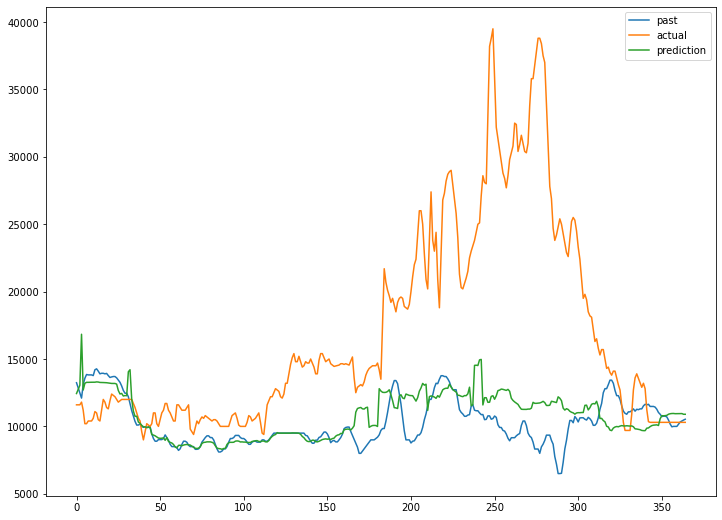

In [39]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(i, label = 'past')
plt.plot(test_df, label = 'actual')
plt.plot(pred_rf, label = 'prediction')
plt.legend()
plt.show()

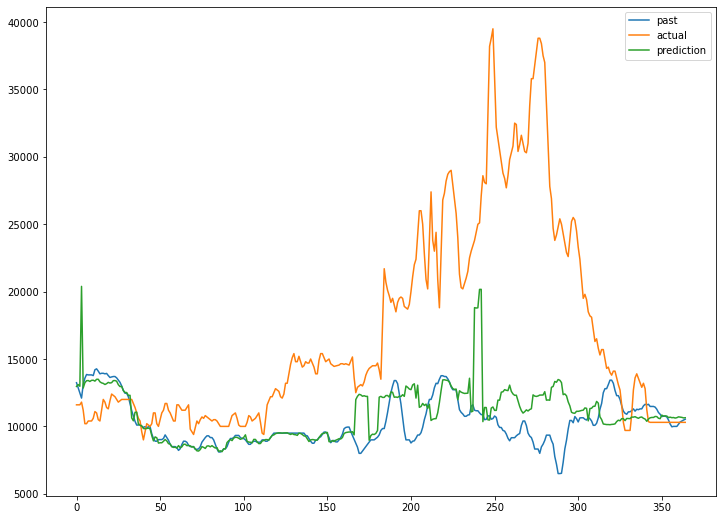

In [40]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(i, label = 'past')
plt.plot(test_df, label = 'actual')
plt.plot(pred_gb, label = 'prediction')
plt.legend()
plt.show()

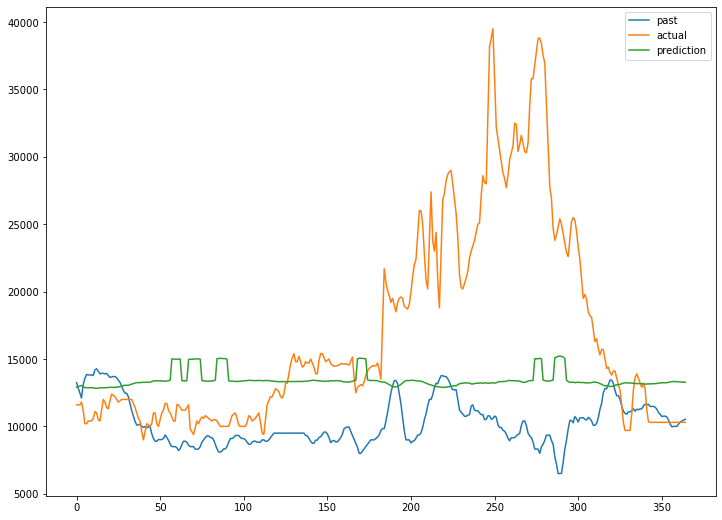

In [41]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(i, label = 'past')
plt.plot(test_df, label = 'actual')
plt.plot(pred_lstm, label = 'prediction')
plt.legend()
plt.show()